# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,3867.415,/8ZbybiGYe8XM4WGmGlhF0ec5R7u.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1761
1,2,False,756681,es,1238.378,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,Veneciafrenia,5.4,55
2,3,False,843241,ja,705.024,/k0ThmZQl5nHe4JefC2bXjqtgYp0.jpg,The Seven Deadly Sins: Cursed by Light,7.8,352
3,4,False,833425,en,491.331,/5cnLoWq9o5tuLe1Zq4BTX4LwZ2B.jpg,No Exit,6.8,533
4,5,False,718789,en,429.093,/tbUhPhir8TGDkD8RruiBAJE9Nd3.jpg,Lightyear,6.8,6


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,3867.415,/8ZbybiGYe8XM4WGmGlhF0ec5R7u.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1761
1,756681,es,1238.378,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,Veneciafrenia,5.4,55
2,843241,ja,705.024,/k0ThmZQl5nHe4JefC2bXjqtgYp0.jpg,The Seven Deadly Sins: Cursed by Light,7.8,352
3,833425,en,491.331,/5cnLoWq9o5tuLe1Zq4BTX4LwZ2B.jpg,No Exit,6.8,533
4,718789,en,429.093,/tbUhPhir8TGDkD8RruiBAJE9Nd3.jpg,Lightyear,6.8,6
...,...,...,...,...,...,...,...
495,696,en,10.241,/k4eT3EvfxW1L9Wmt04UqJqCvCR6.jpg,Manhattan,7.8,1919
496,10724,en,10.224,/rFIjEbUbsiMwYV0MBGaUTdYlJGa.jpg,Firefox,6.0,404
497,12569,en,10.214,/cjen0vxjybwItQPH3NNCJuME2MY.jpg,Extract,5.8,455
498,337674,fr,10.202,/z446adpGUVXXPxrLpKBGnYBcofk.jpg,Elle,6.7,1538


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        497 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,497,500
unique,500,18,497,500
top,59,en,/8ZbybiGYe8XM4WGmGlhF0ec5R7u.jpg,Fantastic Beasts: The Secrets of Dumbledore
freq,1,384,1,1


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.000000,500.000000,500.000000
mean,43.388680,6.171800,1305.346000
std,187.974645,1.625604,2459.170093
min,7.503000,0.000000,0.000000
25%,12.529250,5.800000,95.750000
50%,17.156500,6.450000,410.000000
75%,31.124250,7.100000,1340.000000
max,3867.415000,8.700000,21176.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

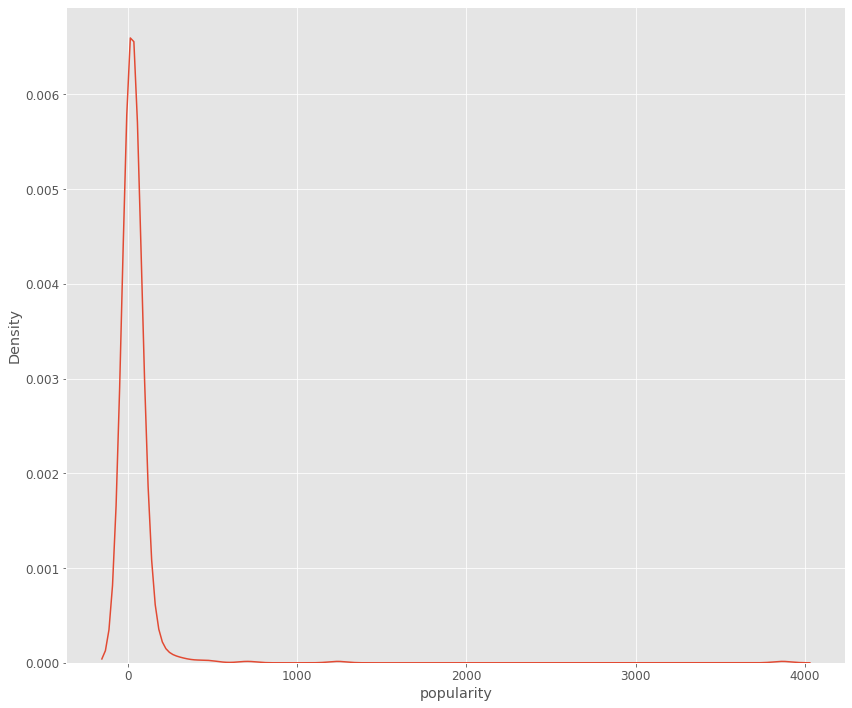

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

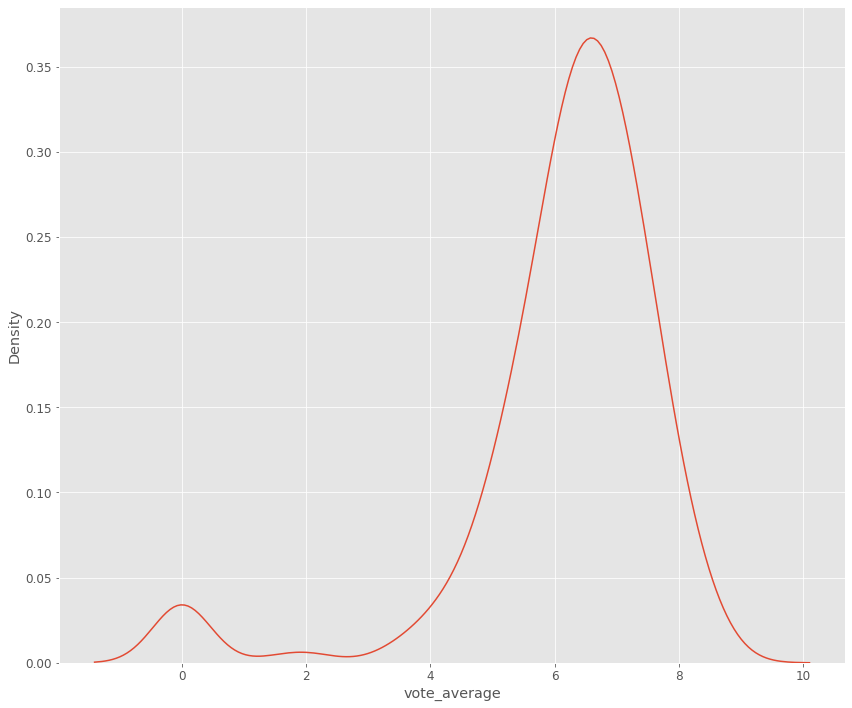

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

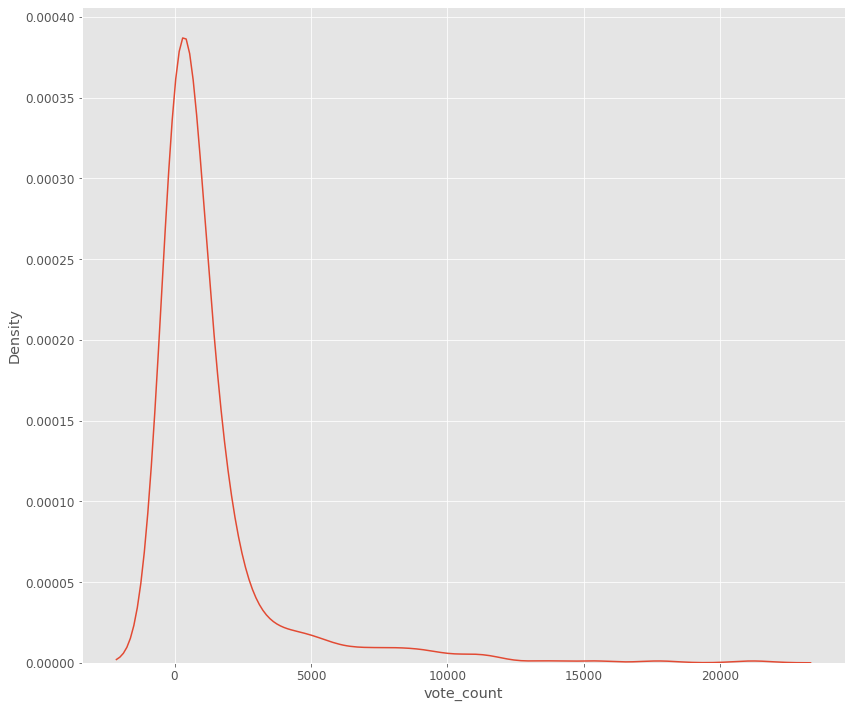

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          3
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

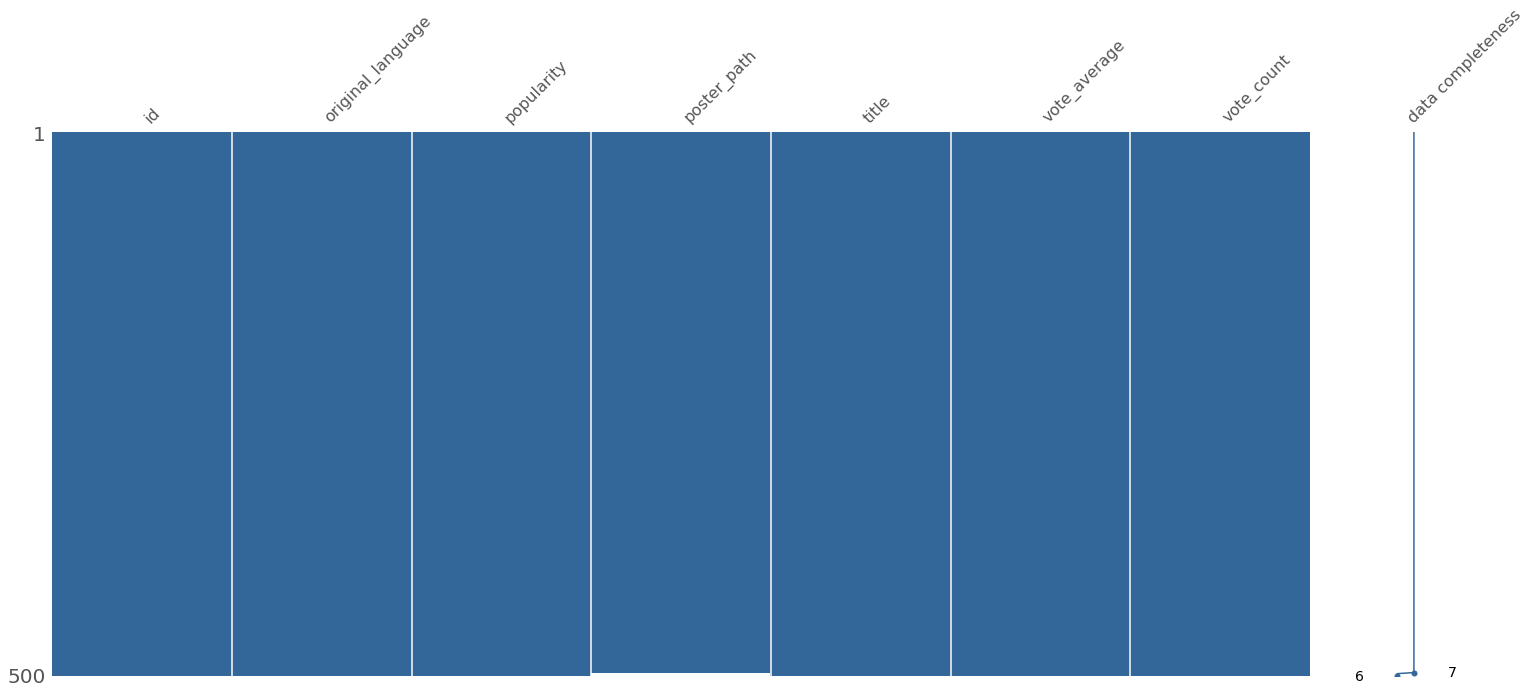

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

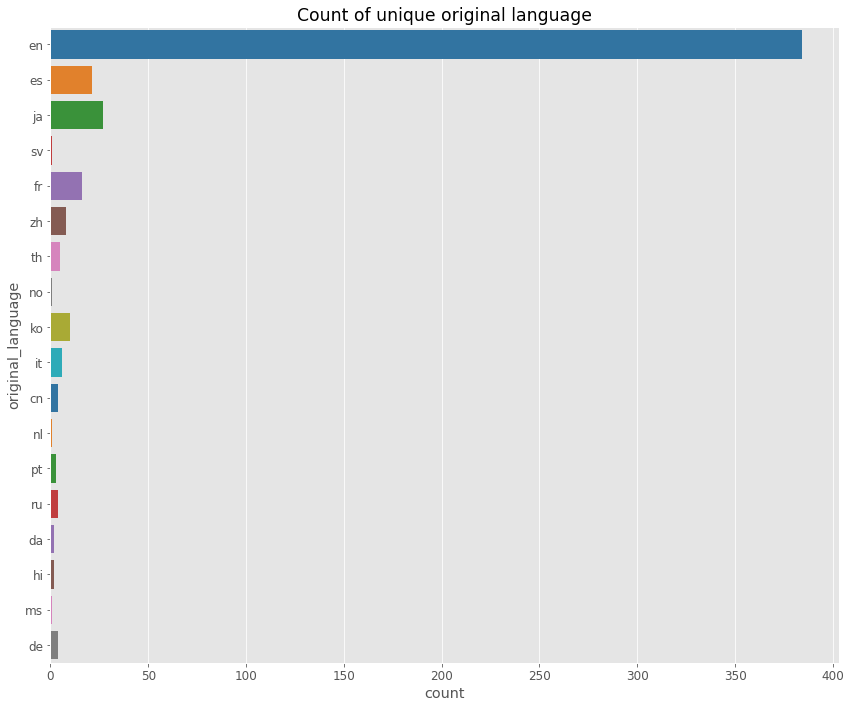

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

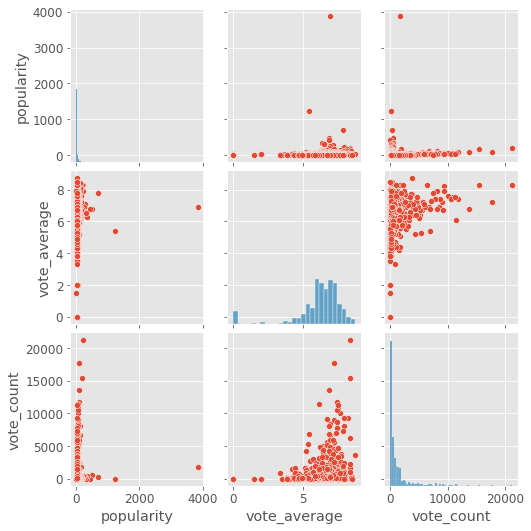

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.056996,0.051969
vote_average,0.056996,1.000000,0.244934
vote_count,0.051969,0.244934,1.000000


<AxesSubplot:>

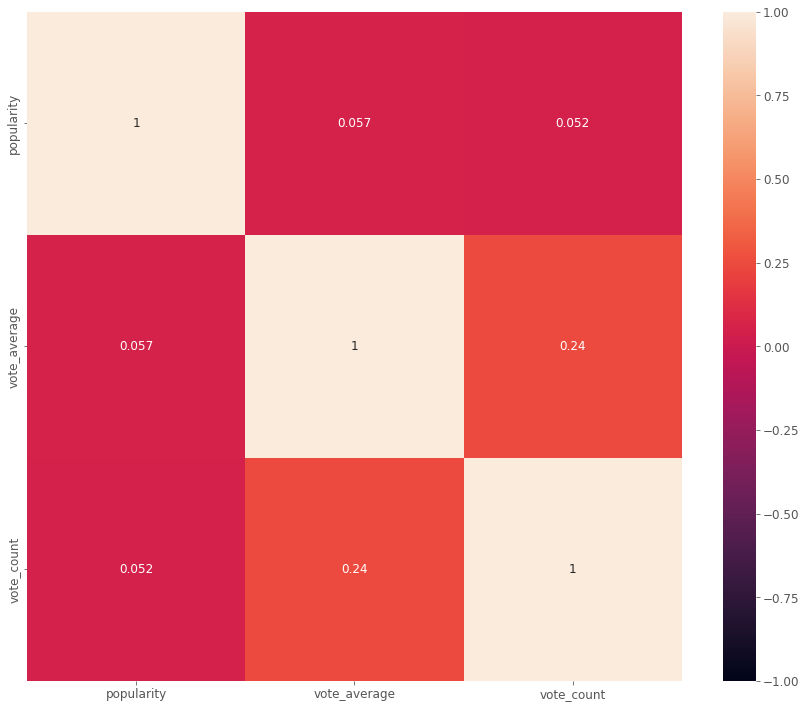

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# set y-axis formatter
def thousand(x, pos):
  return '%1.0fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)

# Top 20 Movies by Popularity 

In [27]:
df_by_pop = df[['title', 'popularity']] \
  .groupby('title')['popularity'] \
  .agg([np.sum]) \
  .sort_values(by='sum', ascending=False) \
  .head(20)

df_by_pop

,sum
title,
Fantastic Beasts: The Secrets of Dumbledore,3867.415
Veneciafrenia,1238.378
The Seven Deadly Sins: Cursed by Light,705.024
No Exit,491.331
Lightyear,429.093
Black Crab,346.373
Queen of Spades,305.723
The In Between,280.389
Jackass Forever,250.517


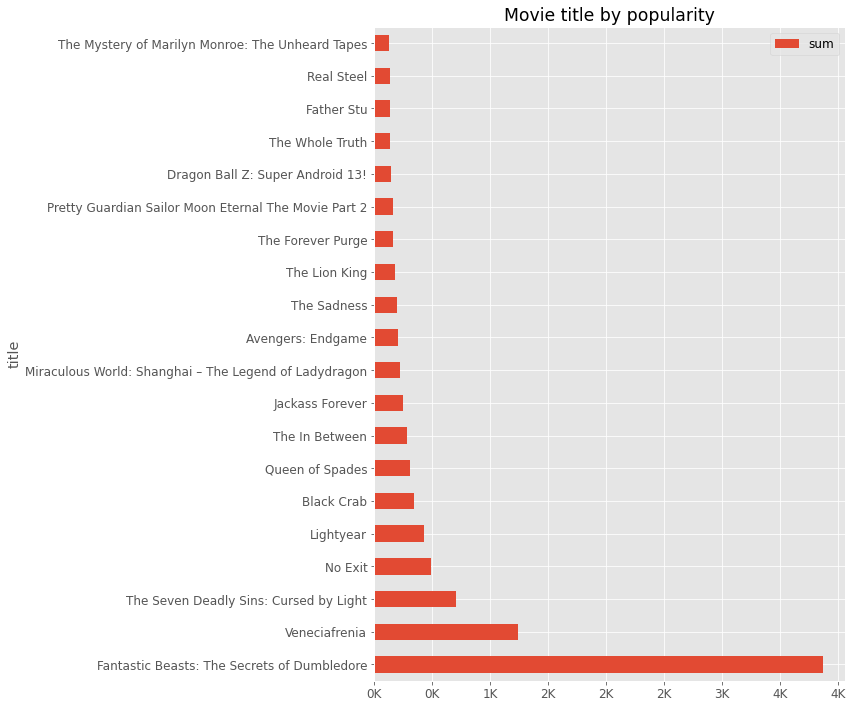

In [28]:
ax1 = df_by_pop.plot(
  kind='barh',
  grid=True,
  ylabel='title', title='Movie title by popularity'
)

ax1.xaxis.set_major_formatter(thousand)

# Top 20 Movies by Vote Count

In [29]:
df_vot_cnt = df[['title', 'vote_count']] \
  .groupby('title')['vote_count'] \
  .agg([np.sum]) \
  .sort_values(by='sum', ascending=False) \
  .head(20)

df_vot_cnt

,sum
title,
Avengers: Endgame,21176
Wonder Woman,17722
The Lion King,15379
The Hunger Games: Mockingjay - Part 1,13601
A Quiet Place,11691
Justice League,11382
Birdman or (The Unexpected Virtue of Ignorance),11303
Blade Runner 2049,10793
Once Upon a Time… in Hollywood,10521


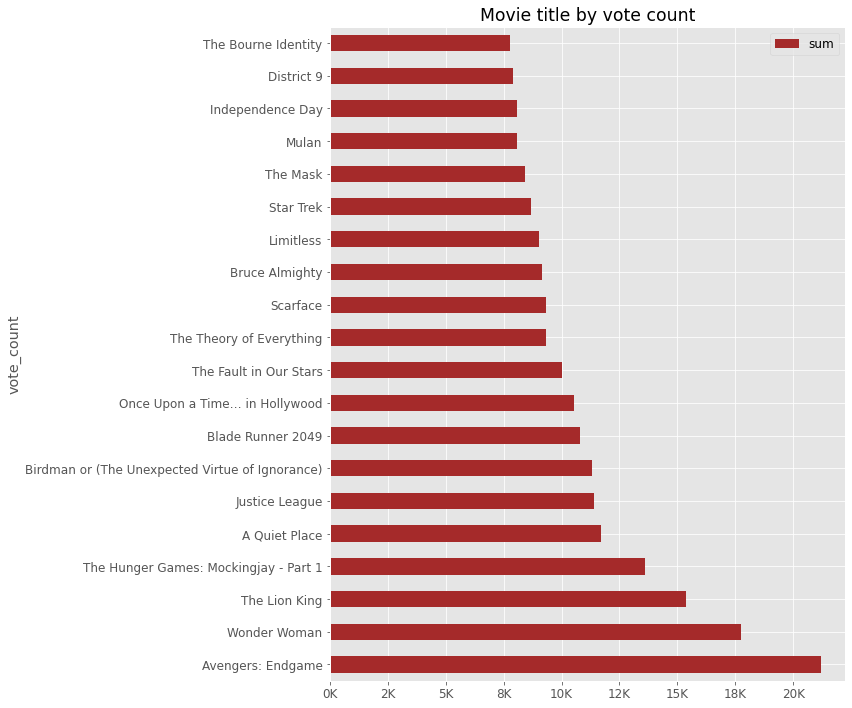

In [30]:
ax2 = df_vot_cnt.plot(
  kind='barh',
  grid=True,
  xlabel='vote_count', ylabel='title', title='Movie title by vote count',
  color='brown'
)

ax2.xaxis.set_major_formatter(thousand)

# Top 20 Movies by Vote Average

In [31]:
df_vot_avg = df[['title', 'vote_average']] \
  .groupby('title')['vote_average'] \
  .agg([np.mean]) \
  .sort_values(by='mean', ascending=False) \
  .head(20)

df_vot_avg

,mean
title,
Dilwale Dulhania Le Jayenge,8.7
Dirty Little Secret,8.5
Avatar：Production Materials,8.5
Impossible Things,8.5
Evangelion: 3.0+1.0 Thrice Upon a Time,8.4
Primal: Tales of Savagery,8.4
Jesus,8.4
Avengers: Endgame,8.3
The Art of Racing in the Rain,8.3


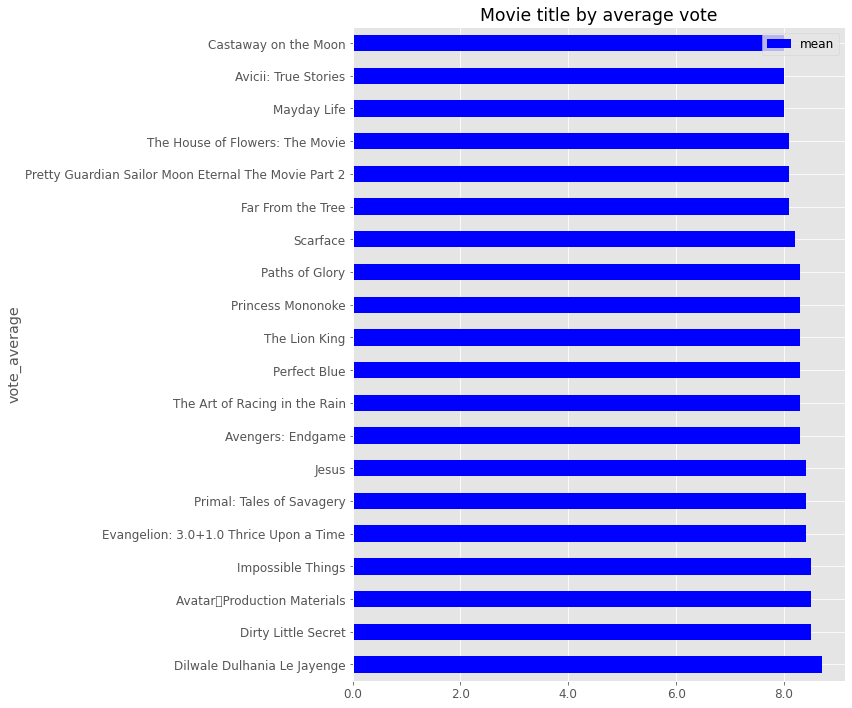

In [32]:
ax3 = df_vot_avg.plot(
  kind='barh',
  grid=True,
  xlabel='vote_average', ylabel='title', title='Movie title by average vote',
  color='blue'
)

ax3.xaxis.set_major_formatter(original)

# Movies With Release Date

In [33]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies[:52]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [34]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,3867.415,/8ZbybiGYe8XM4WGmGlhF0ec5R7u.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1761
1,2,False,756681,es,1238.378,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,2022-04-21,Veneciafrenia,5.4,55
2,3,False,843241,ja,705.024,/k0ThmZQl5nHe4JefC2bXjqtgYp0.jpg,2021-07-02,The Seven Deadly Sins: Cursed by Light,7.8,352
3,4,False,833425,en,491.331,/5cnLoWq9o5tuLe1Zq4BTX4LwZ2B.jpg,2022-02-25,No Exit,6.8,533
4,5,False,718789,en,429.093,/tbUhPhir8TGDkD8RruiBAJE9Nd3.jpg,2022-06-15,Lightyear,6.8,6


In [35]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,3867.415,/8ZbybiGYe8XM4WGmGlhF0ec5R7u.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1761
1,756681,es,1238.378,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,2022-04-21,Veneciafrenia,5.4,55
2,843241,ja,705.024,/k0ThmZQl5nHe4JefC2bXjqtgYp0.jpg,2021-07-02,The Seven Deadly Sins: Cursed by Light,7.8,352
3,833425,en,491.331,/5cnLoWq9o5tuLe1Zq4BTX4LwZ2B.jpg,2022-02-25,No Exit,6.8,533
4,718789,en,429.093,/tbUhPhir8TGDkD8RruiBAJE9Nd3.jpg,2022-06-15,Lightyear,6.8,6


In [36]:
df1.shape

(52, 8)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52 non-null     int64  
 1   original_language  52 non-null     object 
 2   popularity         52 non-null     float64
 3   poster_path        52 non-null     object 
 4   release_date       52 non-null     object 
 5   title              52 non-null     object 
 6   vote_average       52 non-null     float64
 7   vote_count         52 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB


In [38]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [39]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: id
Non-Null Count  Dtype   
--------------  -----   
52 non-null     category
dtypes: category(1)
memory usage: 2.6 KB


In [40]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [41]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,3867.415,/8ZbybiGYe8XM4WGmGlhF0ec5R7u.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1761,2022,4,6,Wednesday,14,2
1,756681,es,1238.378,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,2022-04-21,Veneciafrenia,5.4,55,2022,4,21,Thursday,16,2
2,843241,ja,705.024,/k0ThmZQl5nHe4JefC2bXjqtgYp0.jpg,2021-07-02,The Seven Deadly Sins: Cursed by Light,7.8,352,2021,7,2,Friday,26,3
3,833425,en,491.331,/5cnLoWq9o5tuLe1Zq4BTX4LwZ2B.jpg,2022-02-25,No Exit,6.8,533,2022,2,25,Friday,8,1
4,718789,en,429.093,/tbUhPhir8TGDkD8RruiBAJE9Nd3.jpg,2022-06-15,Lightyear,6.8,6,2022,6,15,Wednesday,24,2


In [42]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,52.0,52,52,52,52,52
unique,52.0,8,52,49,52,7
top,111.0,en,/8ZbybiGYe8XM4WGmGlhF0ec5R7u.jpg,2021-07-30 00:00:00,Fantastic Beasts: The Secrets of Dumbledore,Friday
freq,1.0,38,1,2,1,18
first,NaN,NaN,NaN,1983-12-09 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-06-15 00:00:00,NaN,NaN


In [43]:
df1.drop(columns=['year', 'month', 'day',	'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,52.000000,52.000000,52.000000
mean,239.822673,6.907692,2976.730769
std,548.259968,0.758959,5086.345431
min,58.279000,5.200000,6.000000
25%,77.981500,6.400000,120.500000
50%,103.915500,6.800000,424.000000
75%,169.251500,7.400000,3272.250000
max,3867.415000,8.400000,21176.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

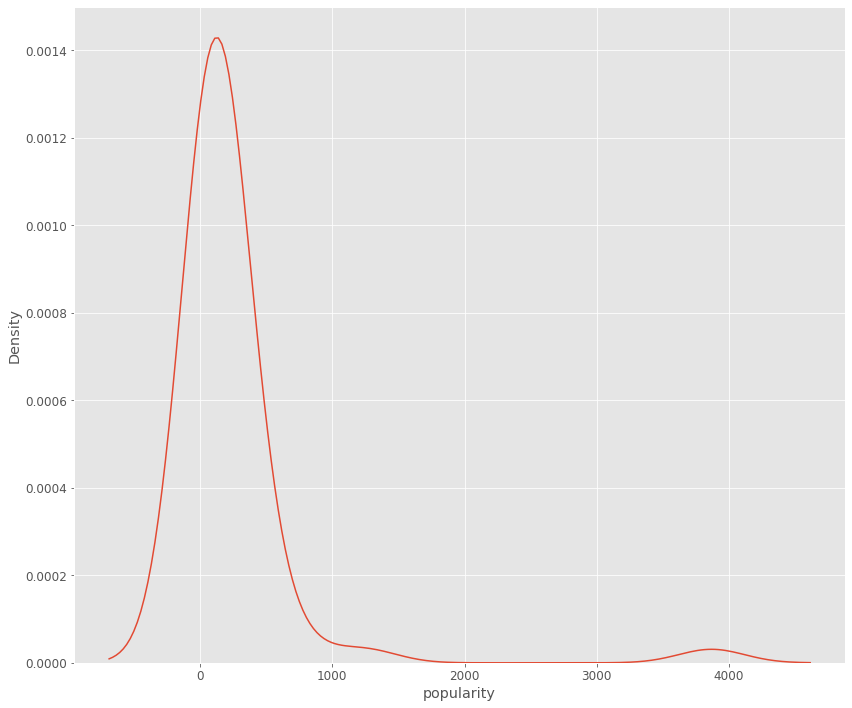

In [44]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

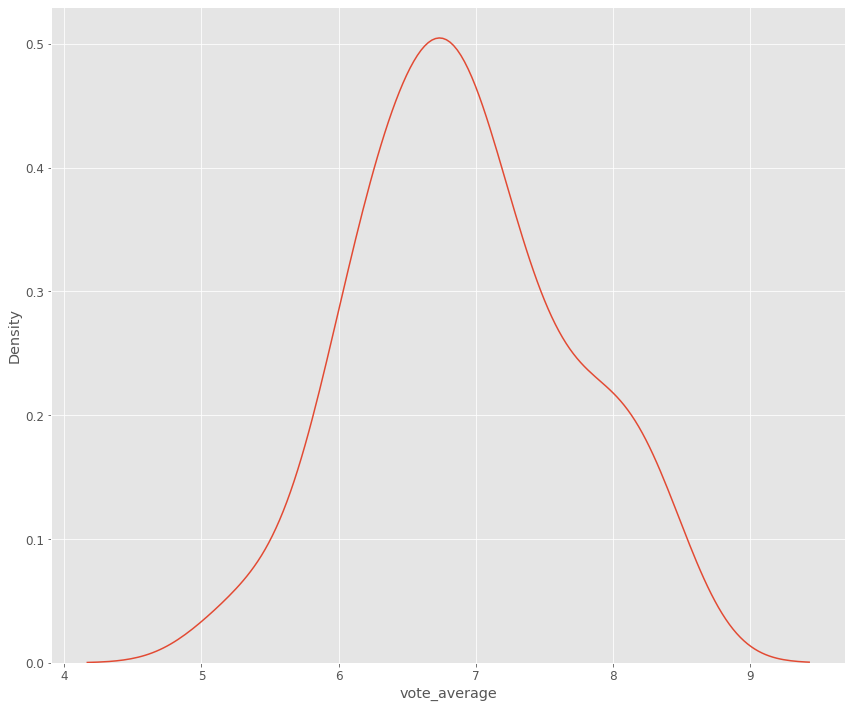

In [45]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

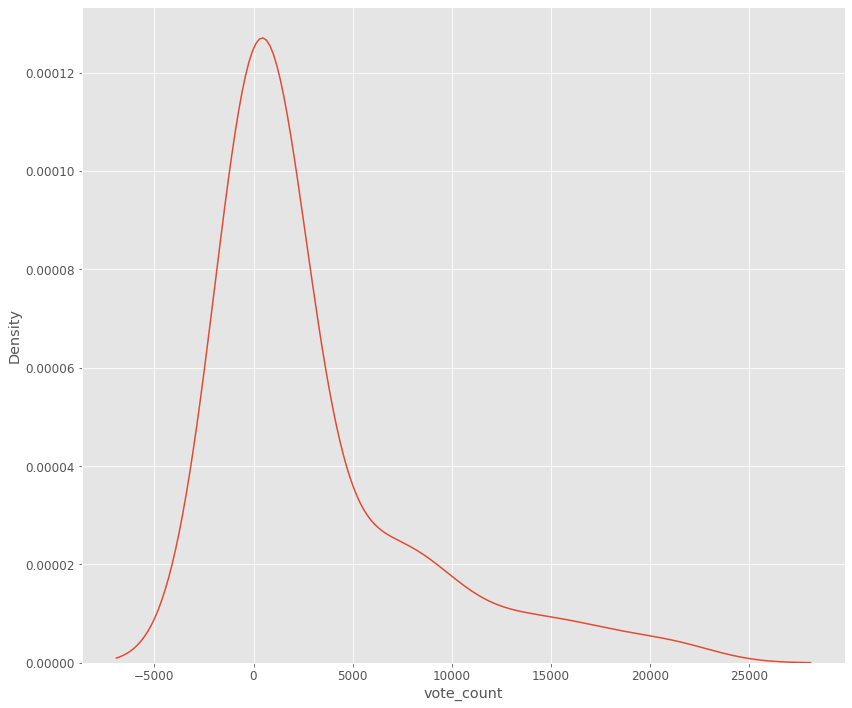

In [46]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [47]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

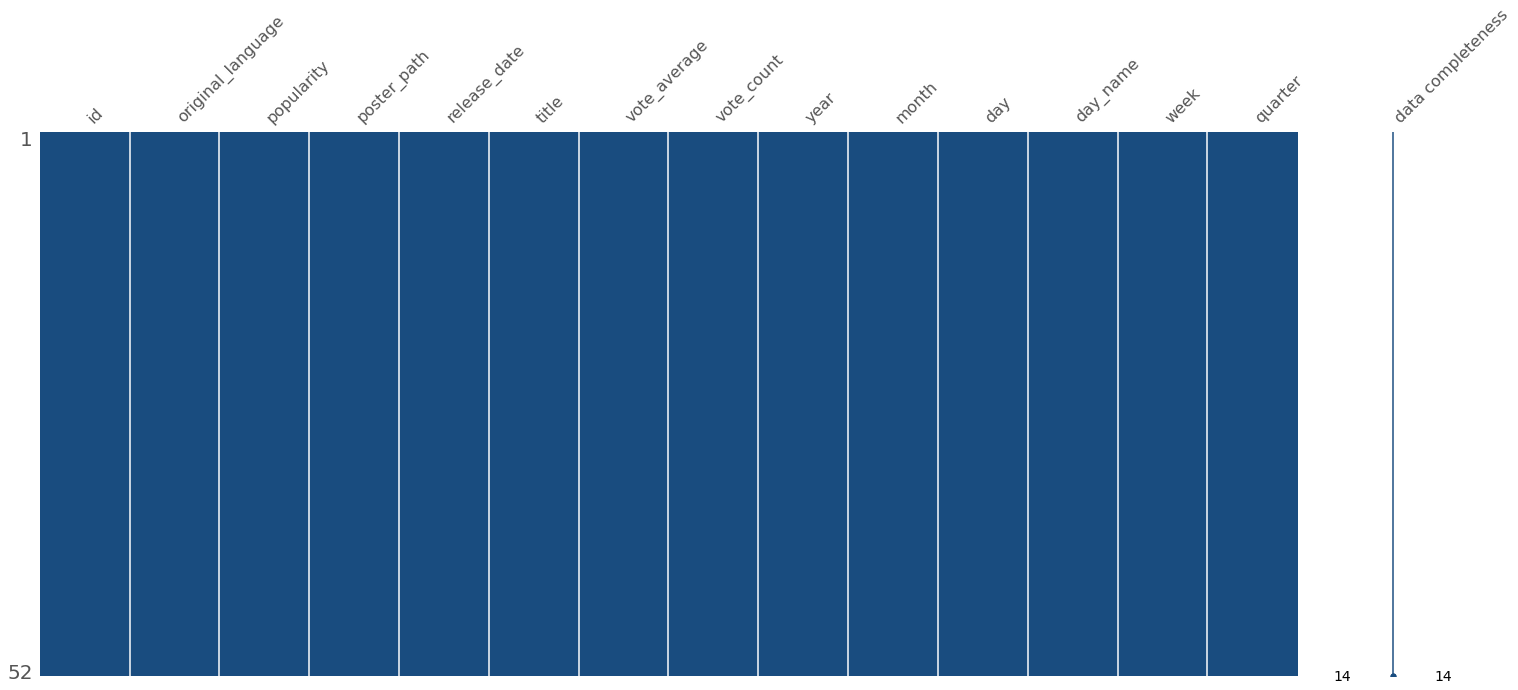

In [48]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [49]:
df1.duplicated().sum()                                # check for duplicates

0

In [50]:
df1.loc[df.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

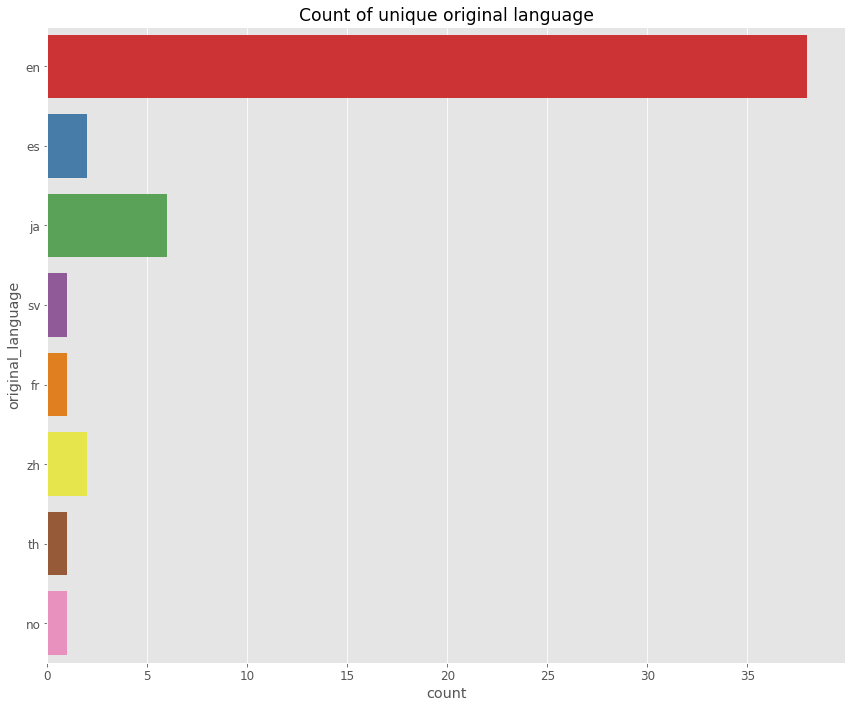

In [51]:
ax4 = sns.countplot(
  data=df1,
  y='original_language', palette='Set1',
)

ax4.set(title='Count of unique original language')

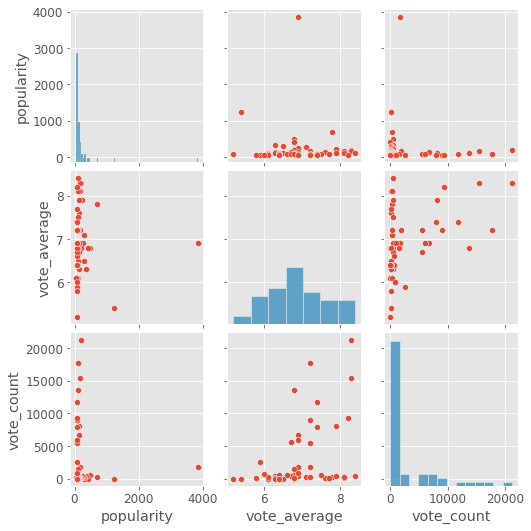

In [52]:
sns.pairplot(df1[['popularity', 'vote_average', 'vote_count']])

In [53]:
df_corr1 = df1[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,-0.042441,-0.082667
vote_average,-0.042441,1.000000,0.432791
vote_count,-0.082667,0.432791,1.000000


<AxesSubplot:>

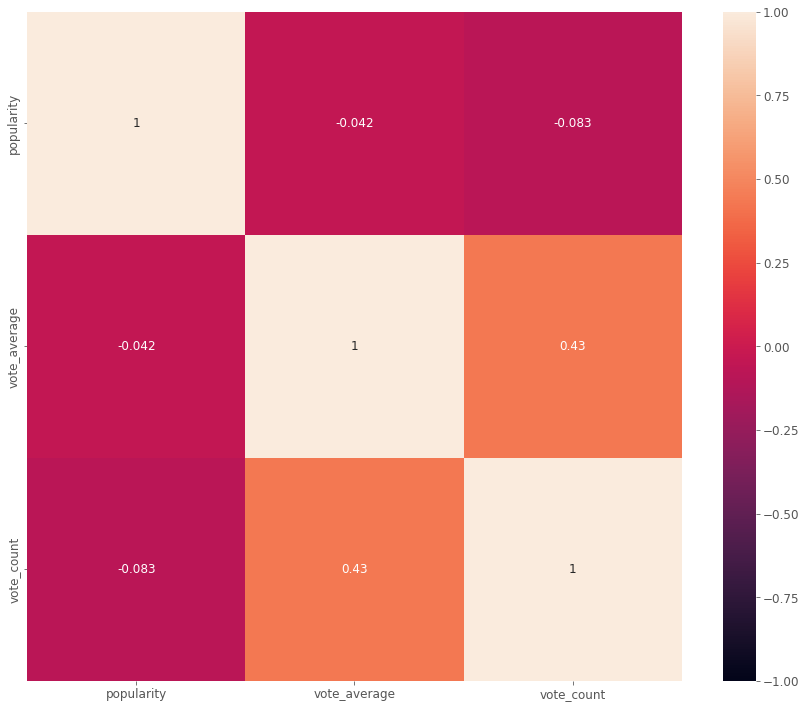

In [54]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)

# Data Grouping and Aggregation

In [55]:
# find top ten years with the highest movie popularity
df1.groupby('year') \
  .agg(np.sum)['popularity'] \
  .sort_values(ascending=False) \
  .head(10)

year
2022    7501.574
2021    3002.971
2011     367.156
2019     204.541
1994     181.217
2018     151.652
1992     144.504
1998     123.302
2014     102.399
2017      96.249
Name: popularity, dtype: float64

In [56]:
# find top ten years with the highest movie count
df1.groupby('year') \
  .agg(np.sum)['vote_count'] \
  .sort_values(ascending=False) \
  .head(10)

year
2011    21398
2019    21176
2017    17722
1994    15379
2018    14204
2014    13601
2021    13287
1983     9330
1998     8074
2009     7900
Name: vote_count, dtype: int64

In [57]:
# find top ten years with the highest average vote
df1.groupby('year') \
  .agg(np.mean)['vote_average'] \
  .sort_values(ascending=False) \
  .head(10)

year
1994    8.300000
2019    8.300000
1983    8.200000
1998    7.900000
2004    7.700000
2009    7.400000
2016    7.200000
2017    7.200000
2021    7.005263
2013    6.900000
Name: vote_average, dtype: float64